Age and Gender Detector Model

###### Importing Libraries

In [1]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dropout,Flatten
from keras.layers import BatchNormalization
from keras.layers import Dense,Conv2D,MaxPooling2D
from keras.layers import Input,Activation,Add
from keras.models import Model
from keras.regularizers import l2
from keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop

###### Extract data from dataset

In [2]:
fldr = './UTKFace'

In [3]:
import os
files = os.listdir(fldr)

In [4]:
ages = []
genders = []
images = []

for file in files:
    age = int(file.split('_')[0])
    gender = int(file.split('_')[1])
    total = fldr+'/'+file
    print(total)
    image = cv2.imread(total)

    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(48,48))
    images.append(image)

./UTKFace/100_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/100_0_0_20170112215240346.jpg.chip.jpg
./UTKFace/100_1_0_20170110183726390.jpg.chip.jpg
./UTKFace/100_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/100_1_0_20170112213303693.jpg.chip.jpg
./UTKFace/100_1_0_20170112215032192.jpg.chip.jpg
./UTKFace/100_1_0_20170117195420803.jpg.chip.jpg
./UTKFace/100_1_0_20170119212053665.jpg.chip.jpg
./UTKFace/100_1_2_20170105174847679.jpg.chip.jpg
./UTKFace/100_1_2_20170112213615815.jpg.chip.jpg
./UTKFace/100_1_2_20170112222336458.jpg.chip.jpg
./UTKFace/101_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/101_1_2_20170105174739309.jpg.chip.jpg
./UTKFace/103_0_2_20170112213001988.jpg.chip.jpg
./UTKFace/105_0_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213021902.jpg.chip.jpg
./UTKFace/105_1_0_20170112213507183.jpg.chip.jpg
./UTKFace/105_1_1_20170112213303693.jpg.chip.jpg
./UTKFace/10_0_0_20161220222308131.jpg.chip.jpg
./UTKFace/10_0_0_2017

In [5]:
for file in files:
    age = int(file.split('_')[0])
    gender = int(file.split('_')[1])
    ages.append(age)
    genders.append(gender)

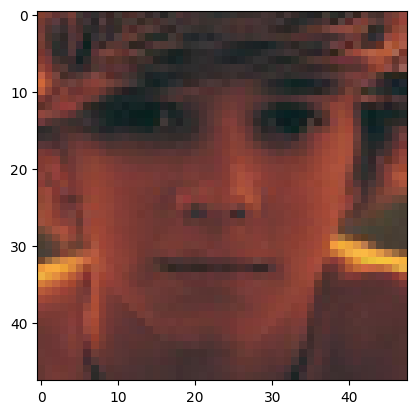

In [6]:
plt.imshow(images[41])

In [7]:
print(ages[41])

10


In [8]:
print(genders[41])

0


###### Saving images array,ages array,and genders array in the system

In [9]:
images_f = np.array(images)
ages_f = np.array(ages)
genders_f = np.array(genders)

In [10]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'age.npy',ages_f)
np.save(fldr+'gender.npy',genders_f)

In [11]:
#Finding the no. of Male and Female samples respectively
values, counts =np.unique(genders_f,return_counts=True)
print(counts) 

[12391 11317]


###### Plotting the no. of Male and Female samples

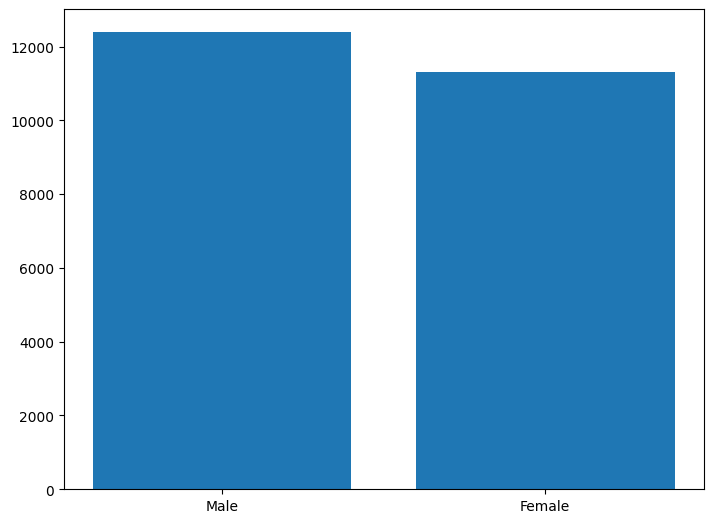

In [12]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
values=[12391,11317]
ax.bar(gender,values)
plt.show()


In [13]:
#Finding the no. of sample in each age
values, counts =np.unique(ages_f,return_counts=True)
print(counts) 

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


In [14]:
# Converting Age counts to lists
val = values.tolist()
cnt = counts.tolist()

###### Plotting the samples Agewise

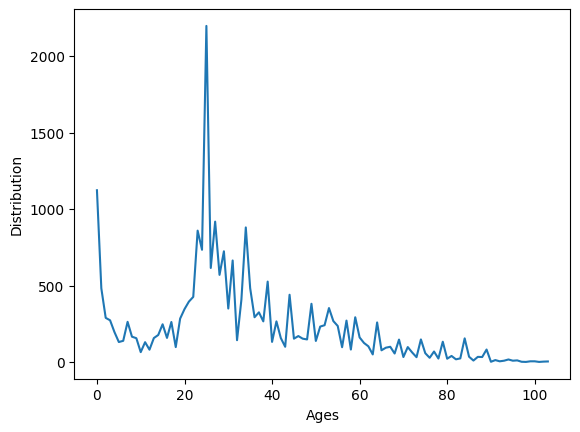

In [15]:
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()

In [16]:
# Defining lables for output
labels = []
i = 0
while i<len(ages):
    label = []
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1

In [17]:
images_f_2 = images_f/255

In [18]:
images_f_2.shape

(23708, 48, 48, 3)

In [19]:
labels_f = np.array(labels)

###### Spliting data into train and test

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(images_f_2,labels_f,test_size=0.25)

In [22]:
Y_train[0:5]

array([[16,  1],
       [21,  0],
       [25,  1],
       [38,  0],
       [21,  1]])

In [23]:
# Converting 2d array into 1d array for better understanding
Y_train_2 = [Y_train[:,1],Y_train[:,0]]
Y_test_2 = [Y_test[:,1],Y_test[:,0]]

In [24]:
Y_train_2[0][0:5]

array([1, 0, 1, 0, 1])

In [25]:
Y_train_2[1][0:5]

array([16, 21, 25, 38, 21])

Defining the Model

In [26]:
def Convolution(input_tensor,filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x

In [27]:
def model(input_shape):
    inputs = Input((input_shape))
    conv_1 = Convolution(inputs,32)
    maxp_1 = MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2 = Convolution(maxp_1,64)
    maxp_2 = MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3 = Convolution(maxp_2,128)
    maxp_3 = MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4 = Convolution(maxp_3,256)
    maxp_4 = MaxPooling2D(pool_size=(2,2))(conv_4)

    flatten = Flatten()(maxp_4)
    dense_1 = Dense(64,activation='relu')(flatten)
    dense_2 = Dense(64,activation='relu')(flatten)

    dropout_1 = Dropout(0.2)(dense_1)
    dropout_2 = Dropout(0.2)(dense_2)

    output_1 = Dense(1,activation='sigmoid',name='sex_out')(dropout_1)
    output_2 = Dense(1,activation='relu',name='age_out')(dropout_2)

    model = Model(inputs=[inputs],outputs=[output_1,output_2])
    model.compile(loss=['binary_crossentropy','mae'],optimizer='Adam',metrics=['accuracy'])
    return model

In [28]:
Model = model((48,48,3))

In [29]:
Model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 48, 48, 32)           896       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 48, 48, 32)           0         ['conv2d[0][0]']              
                                                                                                  
 activation (Activation)     (None, 48, 48, 32)           0         ['dropout[0][0]']             
                                                                                              

Initializing The Model

In [30]:
from keras.callbacks import ModelCheckpoint

In [31]:
file_s = 'Age_Sex_Detection.h5'
checkpoint = ModelCheckpoint(file_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
early_stop = tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights=True)
callback_list = [checkpoint,early_stop]

In [32]:
History = Model.fit(
    X_train,Y_train_2,
    batch_size=64,
    validation_data=(X_test,Y_test_2),
    epochs=50,
    callbacks=callback_list
    )

Epoch 1/50


278/278 [==============================] - ETA: 0s - loss: 17.2077 - sex_out_loss: 0.6880 - age_out_loss: 16.3394 - sex_out_accuracy: 0.5667 - age_out_accuracy: 0.0471
Epoch 1: val_loss improved from inf to 17.61855, saving model to Age_Sex_Detection.h5


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


278/278 [==============================] - 101s 349ms/step - loss: 17.2077 - sex_out_loss: 0.6880 - age_out_loss: 16.3394 - sex_out_accuracy: 0.5667 - age_out_accuracy: 0.0471 - val_loss: 17.6185 - val_sex_out_loss: 0.6749 - val_age_out_loss: 16.7893 - val_sex_out_accuracy: 0.5348 - val_age_out_accuracy: 0.0476
Epoch 2/50
278/278 [==============================] - ETA: 0s - loss: 14.8507 - sex_out_loss: 0.6212 - age_out_loss: 14.0489 - sex_out_accuracy: 0.6536 - age_out_accuracy: 0.0473
Epoch 2: val_loss improved from 17.61855 to 13.25073, saving model to Age_Sex_Detection.h5
278/278 [==============================] - 103s 370ms/step - loss: 14.8507 - sex_out_loss: 0.6212 - age_out_loss: 14.0489 - sex_out_accuracy: 0.6536 - age_out_accuracy: 0.0473 - val_loss: 13.2507 - val_sex_out_loss: 0.5571 - val_age_out_loss: 12.4596 - val_sex_out_accuracy: 0.7127 - val_age_out_accuracy: 0.0476
Epoch 3/50
278/278 [==============================] - ETA: 0s - loss: 11.6927 - sex_out_loss: 0.5194 - a

In [33]:
Model.evaluate(X_test,Y_test_2)

186/186 [==============================] - 10s 51ms/step - loss: 8.5369 - sex_out_loss: 0.2517 - age_out_loss: 7.3977 - sex_out_accuracy: 0.8873 - age_out_accuracy: 0.0476


[8.536876678466797,
 0.25170913338661194,
 7.3976850509643555,
 0.8872954249382019,
 0.047578874975442886]

In [34]:
pred = Model.predict(X_test)

186/186 [==============================] - 9s 49ms/step


###### Ploting Model Loss

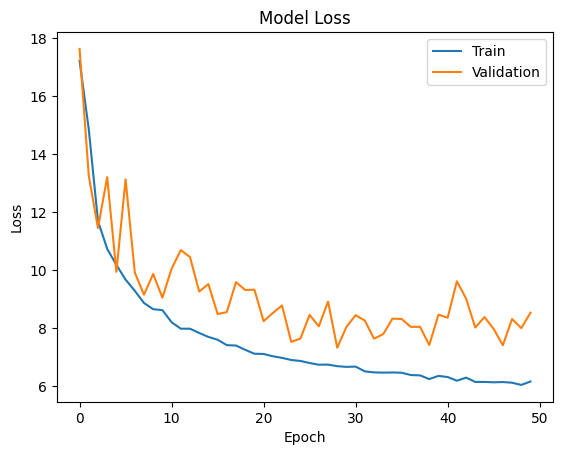

In [35]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Validation'])

###### Plotting Sex Accuracy

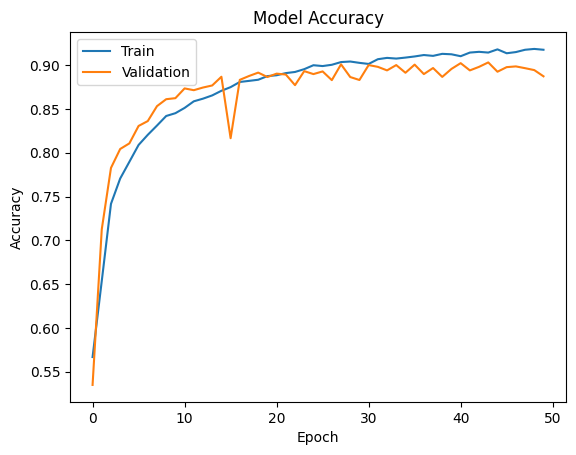

In [36]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'])

###### Plotting Gender Accuracy

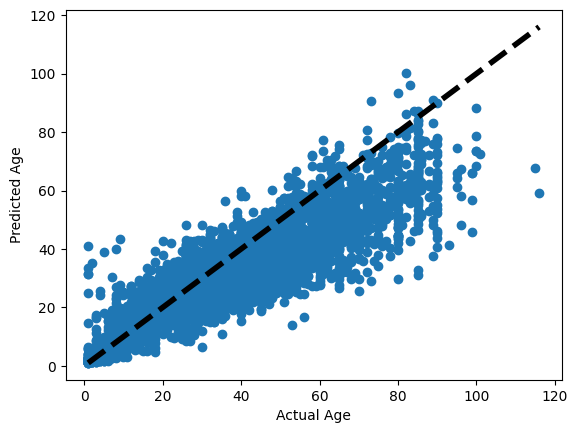

In [37]:
fig,ax=plt.subplots()
ax.scatter(Y_test_2[1],pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()],[Y_test_2[1].min(),Y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

Model Report

In [38]:
i = 0 
Pred_1 = []
while i<len(pred[0]):
    Pred_1.append(int(np.round(pred[0][i])))
    i=i+1

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [40]:
report = classification_report(Y_test_2[0],Pred_1)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.87      0.89      3148
           1       0.86      0.91      0.88      2779

    accuracy                           0.89      5927
   macro avg       0.89      0.89      0.89      5927
weighted avg       0.89      0.89      0.89      5927



In [41]:
results = confusion_matrix(Y_test_2[0],Pred_1)

<Axes: >

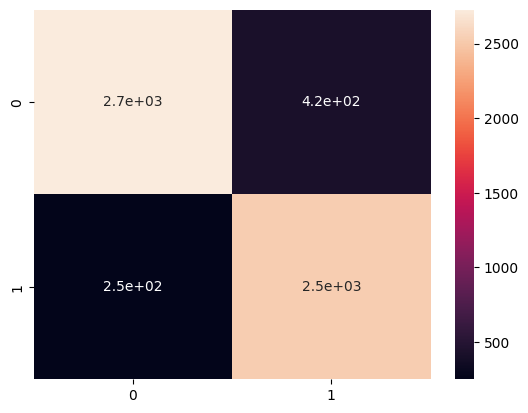

In [42]:
import seaborn as sns
sns.heatmap(results,annot=True)

###### Testing The Images

In [43]:
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test = images_f_2[ind]
    pred_1 = Model.predict(np.array([image_test]))
    sex_f = ['Male','Female']
    age = int(np.round(pred_1[1][0]))
    sex = int(np.round(pred_1[0][0]))
    print("Predicted Age is: " + str(age))
    print("Pridicted Gender is: " + sex_f[sex])

1/1 [==============================] - 0s 37ms/step
Predicted Age is: 88
Pridicted Gender is: Female


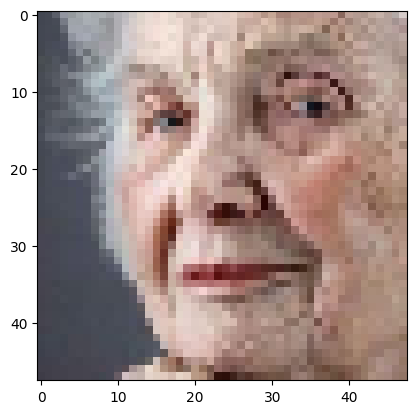

In [44]:
test_image(4,images_f,images_f_2,Model)

1/1 [==============================] - 0s 30ms/step
Predicted Age is: 9
Pridicted Gender is: Male


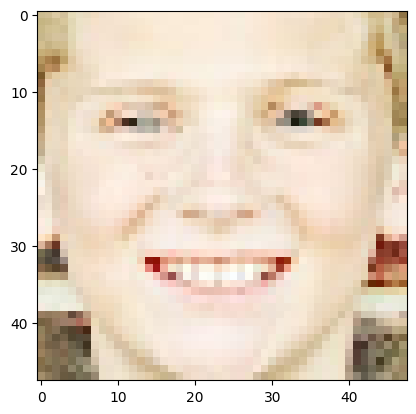

In [45]:
test_image(40,images_f,images_f_2,Model)

1/1 [==============================] - 0s 31ms/step
Predicted Age is: 7
Pridicted Gender is: Male


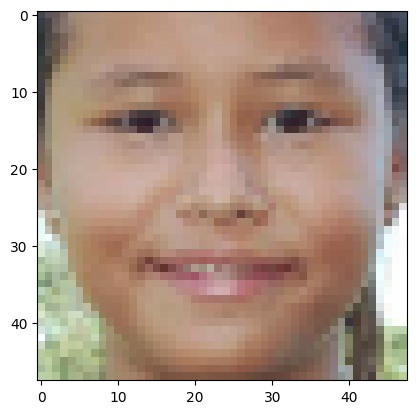

In [46]:
test_image(150,images_f,images_f_2,Model)